# **Подготовка наборов данных**

In [2]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import re
import string
import pymorphy2
from nltk.corpus import stopwords

In [4]:
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')

print(stopwords.words('russian')) 

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
morph = pymorphy2.MorphAnalyzer()
stopwords_list = stopwords.words('russian')
stopwords_list.extend(['куплет', 'это', 'я', 'мы', 'ты', 'припев', 'аутро', 'предприпев', 'lyrics', '1', '2', '3', 'то']) # сначала надо сформировать файлы
string.punctuation += '—'

In [6]:
result_dict = dict()

songs_2013 = {
    '1 Ледяная':'1 Ледяная',   # что-то пока так
    '2 ищи меня':'2 ищи меня',
    '3 все решено':'3 все решено',
    '4 не верю':'4 не верю',
    '5 одержима':'5 одержима',
    '6 моя душа':'6 моя душа',
    '7 море':'7 море',
    '8 стоп любовь':'8 стоп любовь',
    '9 Offline':'9 Offline',
    '10 маме':'10 маме',
    '11 ангел':'11 ангел',
    '12 криминал':'12 криминал',
    '13 ненавижу, но люблю':'13 ненавижу, но люблю',
    '14 нет ответа':'14 нет ответа',
    '15 вызывай 03':'15 вызывай 03',
    '16 не моей породы':'16 не моей породы',
    '17 все решено':'17 все решено',
    '18 чужая весна':'18 чужая весна',
}

In [10]:
def read_song(filename):
    f = open(f'/content/elvira/одержима/{filename}.txt', 'r').read()
    f = f.replace('\n', ' ')
    return f

def clean_string(text):
    text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!', text)
    text = ' '.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

def string_to_normal_form(string):
    string_lst = string.split()
    for i in range(len(string_lst)):
        string_lst[i] = morph.parse(string_lst[i])[0].normal_form
        if (string_lst[i] == 'рая'):
            string_lst[i] = 'рай'
    string = ' '.join(string_lst)
    return string

In [11]:
name_list = []
text_list = []
for song, name in songs_2013.items():
    text = string_to_normal_form(clean_string(read_song(song)))
    name_list.append(name)
    text_list.append(text)

In [12]:
df = pd.DataFrame()
df['name'] = name_list
df['text'] = text_list
df['time'] = [197, 194, 217, 216, 182, 232, 217, 199, 210, 198, 222, 253, 259, 174, 283, 171, 185, 167 ]
df.to_csv('odergima.csv', index=False)

# Обработка естественного языка

## Одержима

In [13]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams

%matplotlib inline
nltk.download('punkt')
df = pd.read_csv('odergima.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Figure size 432x288 with 0 Axes>

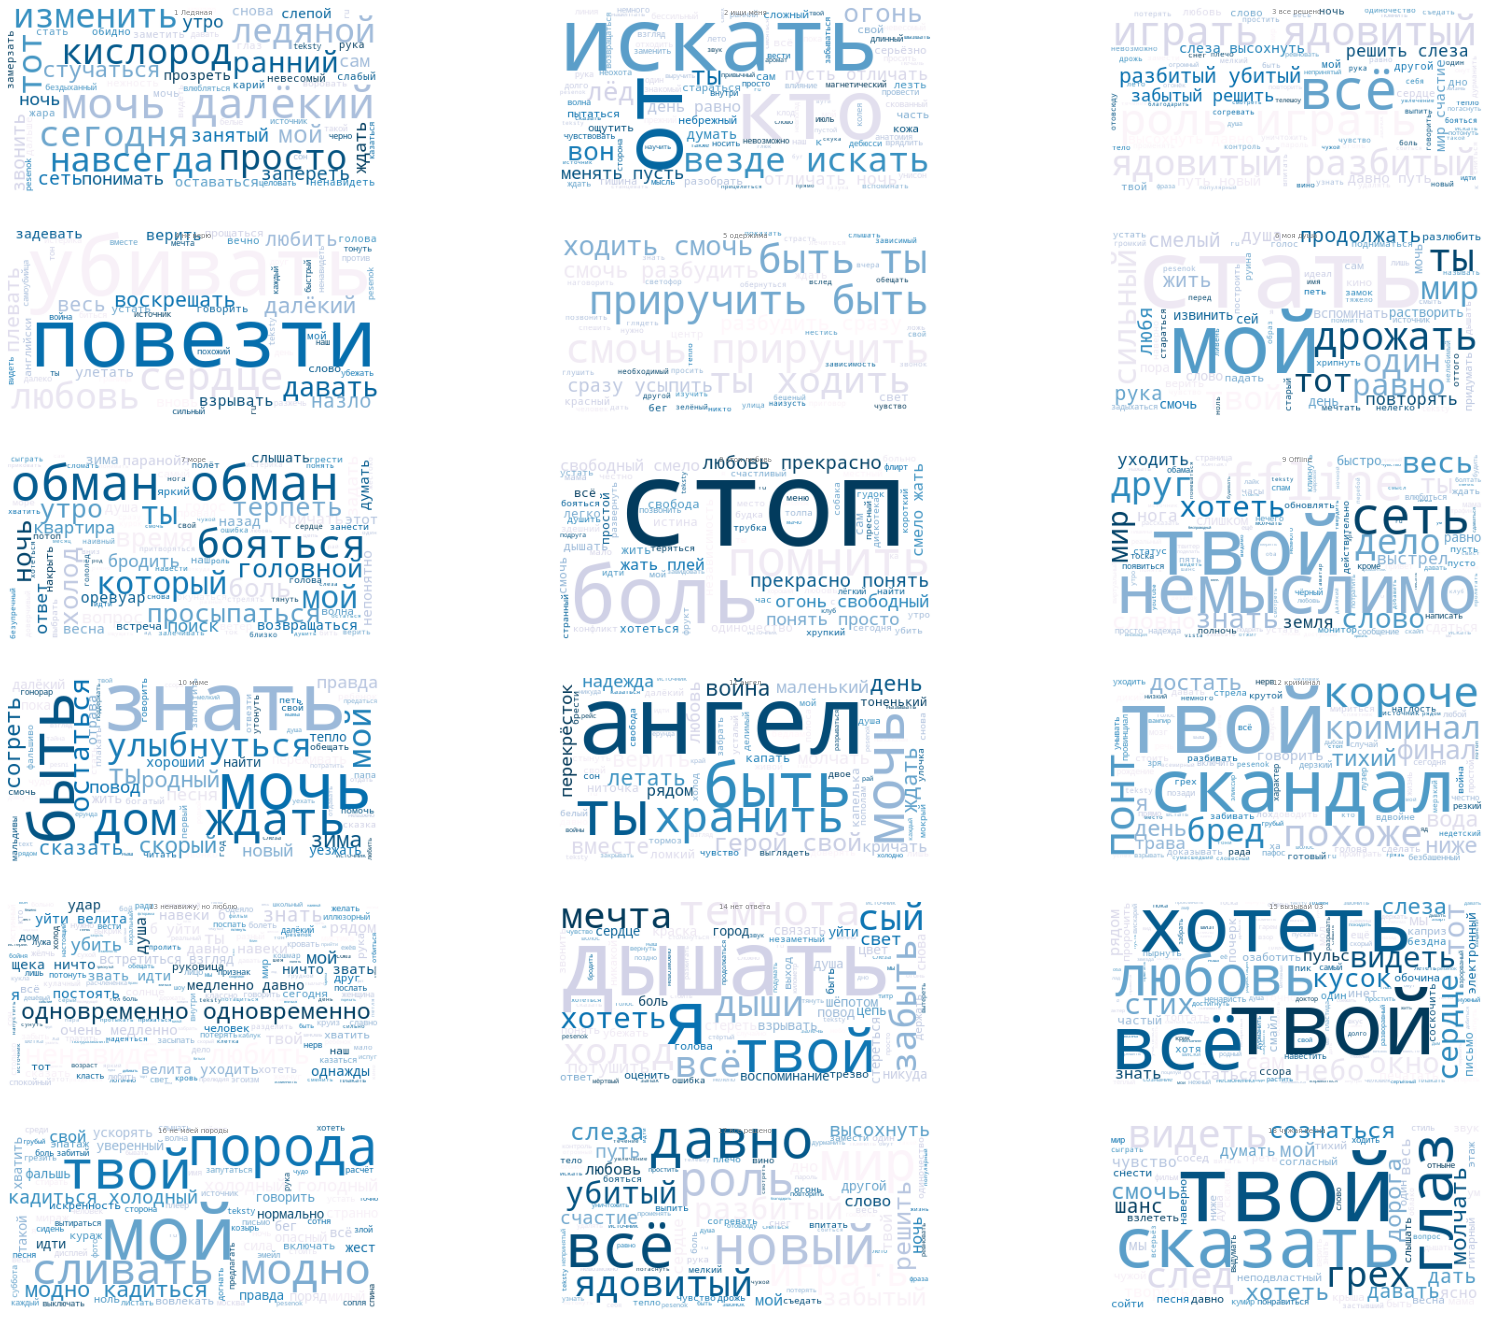

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.figure(figsize=(28, 24))
i = 1
for name, text in zip(df.name, df.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
    plt.subplot(6, 3, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1


In [16]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import spatial
import collections
import pymorphy2
import gensim

morph = pymorphy2.MorphAnalyzer()

In [17]:
songs = []
total = []
uniq = []
percent = []

for song, text in zip(df.name, df.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)

In [18]:
df_words = pd.DataFrame()
df_words['song'] = songs
df_words['total words'] = total
df_words['uniq words'] = uniq
df_words['percent'] = percent
df_words['time'] = df['time']
df_words['words per minute'] = round(total / (df['time'] // 60))
df_words = df_words[::-1]
df_words

song  total words  uniq words  percent  time  \
17         18 чужая весна           96          64     67.0   167   
16          17 все решено          132          89     67.0   185   
15      16 не моей породы          136          81     60.0   171   
14          15 вызывай 03          176         153     87.0   283   
13          14 нет ответа          103          82     80.0   174   
12  13 ненавижу, но люблю          317         209     66.0   259   
11            12 криминал          135          96     71.0   253   
10               11 ангел          127          71     56.0   222   
9                 10 маме          117          75     64.0   198   
8               9 Offline          142         117     82.0   210   
7           8 стоп любовь          131          73     56.0   199   
6                  7 море          159          97     61.0   217   
5              6 моя душа           89          67     75.0   232   
4              5 одержима          133          50     38.0   182   
3               4 не верю           66          51     77.0   216   
2            3 все решено          143          85     59.0   217   
1              2 ищи меня          186         102     55.0   194   
0               1 Ледяная           94          54     57.0   197   

    words per minute  
17              48.0  
16              44.0  
15              68.0  
14              44.0  
13              52.0  
12              79.0  
11              34.0  
10              42.0  
9               39.0  
8               47.0  
7               44.0  
6               53.0  
5               30.0  
4               44.0  
3               22.0  
2               48.0  
1               62.0  
0               31.0

In [19]:
colors_1 = ['rgba(101,181,205,255)'] * 18
colors_2 = ['rgba(62,142,231,255)'] * 18

fig = go.Figure(data=[
    go.Bar(name='📝 Всего слов',
           text=df_words['total words'],
           textposition='auto',
           x=df_words.song,
           y=df_words['total words'],
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),),
    go.Bar(name='🌀 Уникальных слов',
           text=df_words['uniq words'].astype(str) + '<br>'+ df_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=df_words.song,
           y=df_words['uniq words'],
           textfont_color='white',
           marker_color=colors_2,
           marker=dict(line=dict(width=0)),),
])

fig.update_layout(barmode='group')

fig.update_layout(
    title = 
        {'text':'<b>Соотношение числа уникальных слов к общему количеству</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="right",
))

fig.show()


In [20]:
colors_1 = ['rgba(101,181,205,255)'] * 18
colors_2 = ['rgba(238,85,59,255)'] * 18

fig = go.Figure(data=[
    go.Bar(name='⏱️ Длина трека, мин.',
           text=round(df_words['time'] / 60, 1),
           textposition='auto',
           x=df_words.song,
           y=-df_words['time'] // 60,
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),
          ),
    go.Bar(name='🔄 Слов в минуту',
           text=df_words['words per minute'],
           textposition='auto',
           x=df_words.song,
           y=df_words['words per minute'],
           marker_color=colors_2,
           textfont_color='white',
           marker=dict(line=dict(width=0)),
          ),
])

fig.update_layout(barmode='overlay')

fig.update_layout(
    title = 
        {'text':'<b>Длина трека и число слов в минуту</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)'
)


fig.show()

In [23]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [24]:
def get_vector(word_list):
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [25]:
vec_list = []
for word in df['text']:
    vec_list.append(get_vector(word.split()))
df['vector'] = vec_list

In [26]:
similar = dict()
result = []
for song_1, vector_1 in zip(df.name, df.vector):
    sub_list = []
    for song_2, vector_2 in zip(df.name.iloc[::-1], df.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res > 0.9 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [27]:
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

name  value
0           3 все решено / 17 все решено   1.00
2  13 ненавижу, но люблю / 15 вызывай 03   0.92
3          14 нет ответа / 15 вызывай 03   0.91
4          15 вызывай 03 / 17 все решено   0.91
1      4 не верю / 13 ненавижу, но люблю   0.90

In [28]:
colors = ['rgba(101,181,205,255)'] * 5

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        marker_color=colors,
                        width=[0.4,0.4,0.4,0.4,0.4],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(
    title = 
        {'text':'<b>Топ-5 схожих песен</b><br><span style="color:#666666"></span>'},
    showlegend = False,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()

In [29]:
def get_word_from_tlist(lst):
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in df.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
get_word_from_tlist(sim_word)

думать бояться видеть чувствовать казаться говорить подумать сам потому сказать 

In [30]:
sim_word

[('думать_VERB', 0.7286797761917114),
 ('бояться_VERB', 0.6671206951141357),
 ('видеть_VERB', 0.6643577814102173),
 ('чувствовать_VERB', 0.6629588007926941),
 ('казаться_VERB', 0.6584055423736572),
 ('говорить_VERB', 0.652103066444397),
 ('подумать_VERB', 0.6483224630355835),
 ('сам_ADJ', 0.6424522399902344),
 ('потому_ADV', 0.6336206197738647),
 ('сказать_VERB', 0.6314419507980347)]

In [31]:
oderjima2013_vec = sim_word
oderjima2013 = get_word_from_tlist(sim_word)

думать бояться видеть чувствовать казаться говорить подумать сам потому сказать 

In [32]:
colorscale=[[0.0, "rgba(255,255,255,255)"],
            [0.1, "rgba(229,232,237,255)"],
            [0.2, "rgba(216,222,232,255)"],
            [0.3, "rgba(205,214,228,255)"],
            [0.4, "rgba(182,195,218,255)"],
            [0.5, "rgba(159,178,209,255)"],
            [0.6, "rgba(137,161,200,255)"],
            [0.7, "rgba(107,137,188,255)"],
            [0.8, "rgba(96,129,184,255)"],
            [1.0, "rgba(76,114,176,255)"]]

font_colors = ['black']
x = list(df.name.iloc[::-1])
y = list(df.name)
fig = ff.create_annotated_heatmap(result, x=x, y=y, colorscale=colorscale, font_colors=font_colors)
fig.show()

##Не люби

In [33]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams

%matplotlib inline
nltk.download('punkt')
df = pd.read_csv('no_love.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

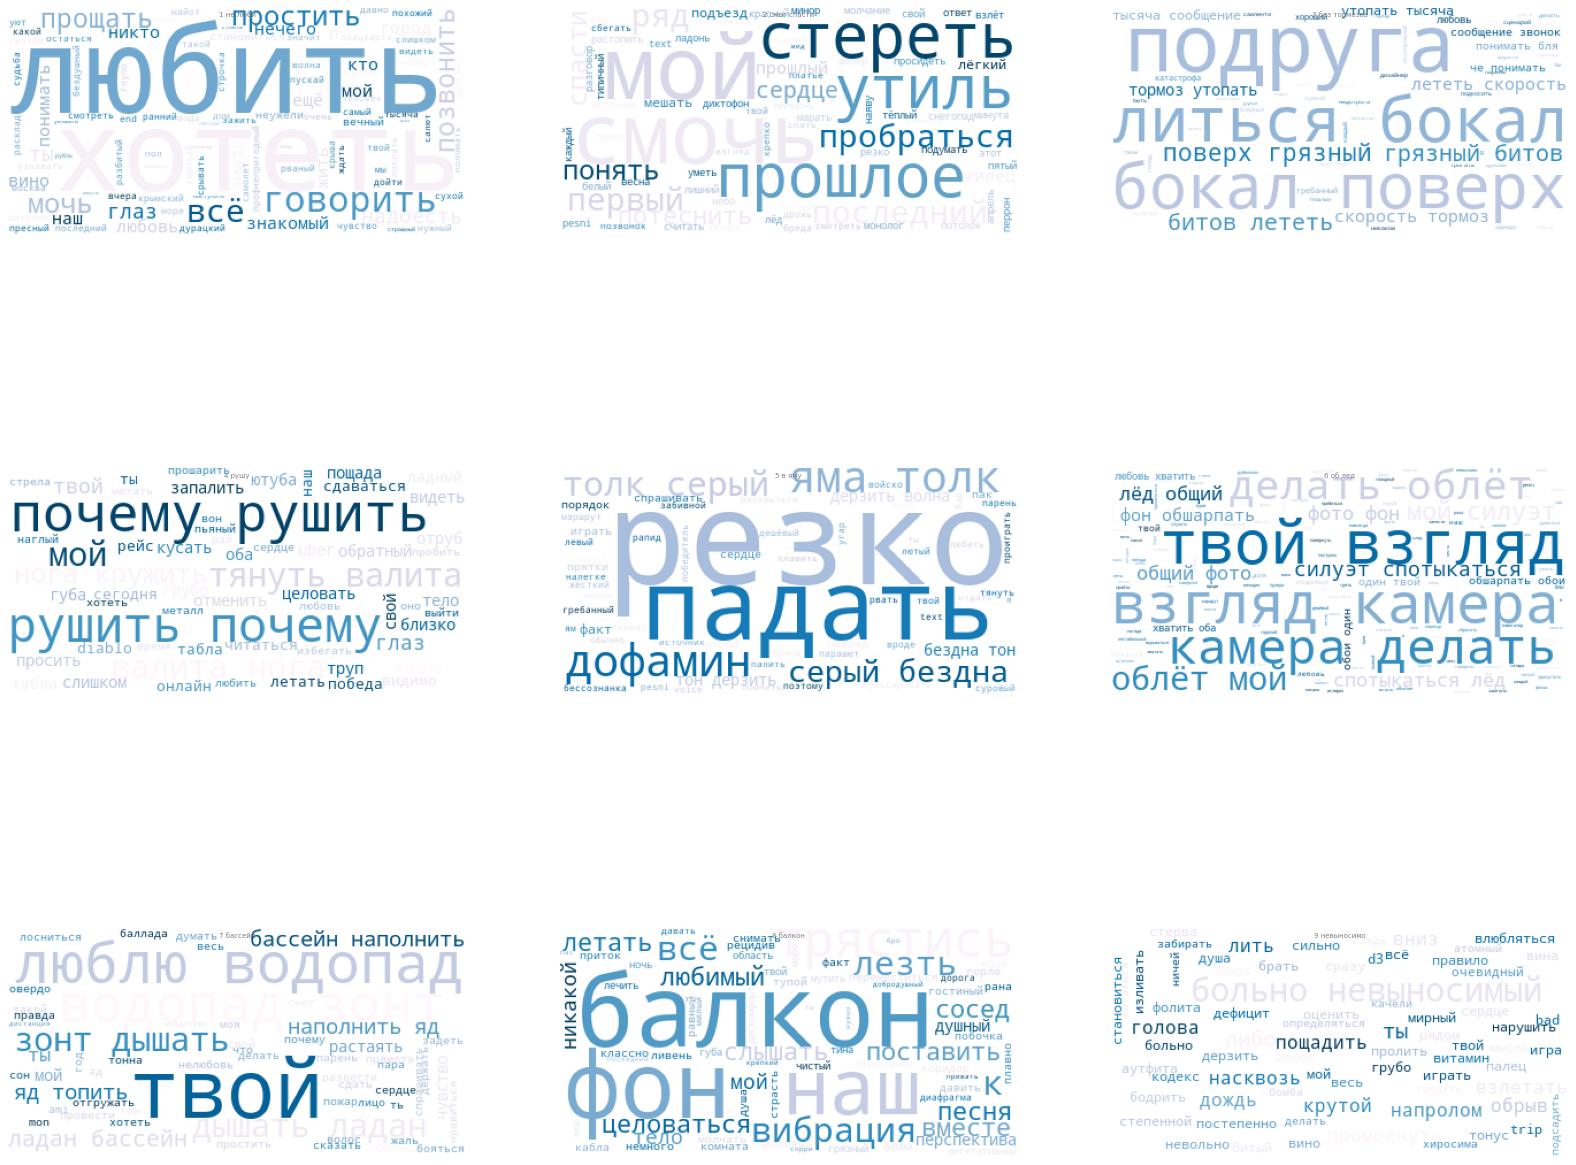

In [34]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.figure(figsize=(28, 24))
i = 1
for name, text in zip(df.name, df.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
    plt.subplot(3, 3, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1

In [35]:
songs = []
total = []
uniq = []
percent = []

for song, text in zip(df.name, df.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)

In [36]:
df_words = pd.DataFrame()
df_words['song'] = songs
df_words['total words'] = total
df_words['uniq words'] = uniq
df_words['percent'] = percent
df_words['time'] = df['time']
df_words['words per minute'] = round(total / (df['time'] // 60))
df_words = df_words[::-1]
df_words

song  total words  uniq words  percent  time  words per minute
8    9 невыносимо          103          71     69.0   140              52.0
7        8 балкон          117          73     62.0   127              58.0
6       7 бассейн           95          59     62.0   159              48.0
5        6 об лед          236         132     56.0   202              79.0
4         5 в яму          106          63     59.0   145              53.0
3          4 рушу          101          60     59.0   126              50.0
2  3 без тормозов          117          60     51.0   149              58.0
1   2 смог спасти          116          75     65.0   130              58.0
0       1 не люби          149         100     67.0   194              50.0

In [37]:
colors_1 = ['rgba(101,181,205,255)'] * 9
colors_2 = ['rgba(62,142,231,255)'] * 9

fig = go.Figure(data=[
    go.Bar(name='📝 Всего слов',
           text=df_words['total words'],
           textposition='auto',
           x=df_words.song,
           y=df_words['total words'],
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),),
    go.Bar(name='🌀 Уникальных слов',
           text=df_words['uniq words'].astype(str) + '<br>'+ df_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=df_words.song,
           y=df_words['uniq words'],
           textfont_color='white',
           marker_color=colors_2,
           marker=dict(line=dict(width=0)),),
])

fig.update_layout(barmode='group')

fig.update_layout(
    title = 
        {'text':'<b>Соотношение числа уникальных слов к общему количеству</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="right",
))

fig.show()

In [38]:
colors_1 = ['rgba(101,181,205,255)'] * 9
colors_2 = ['rgba(238,85,59,255)'] * 9

fig = go.Figure(data=[
    go.Bar(name='⏱️ Длина трека, мин.',
           text=round(df_words['time'] / 60, 1),
           textposition='auto',
           x=df_words.song,
           y=-df_words['time'] // 60,
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),
          ),
    go.Bar(name='🔄 Слов в минуту',
           text=df_words['words per minute'],
           textposition='auto',
           x=df_words.song,
           y=df_words['words per minute'],
           marker_color=colors_2,
           textfont_color='white',
           marker=dict(line=dict(width=0)),
          ),
])

fig.update_layout(barmode='overlay')

fig.update_layout(
    title = 
        {'text':'<b>Длина трека и число слов в минуту</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)'
)


fig.show()

In [39]:
def get_vector(word_list):
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [40]:
vec_list = []
for word in df['text']:
    vec_list.append(get_vector(word.split()))
df['vector'] = vec_list

In [41]:
similar = dict()
result = []
for song_1, vector_1 in zip(df.name, df.vector):
    sub_list = []
    for song_2, vector_2 in zip(df.name.iloc[::-1], df.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res >= 0.8 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [42]:
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

name  value
4       6 об лед / 8 балкон   0.86
0  2 смог спасти / 6 об лед   0.81
1     4 рушу / 9 невыносимо   0.81
3   6 об лед / 9 невыносимо   0.81
2    5 в яму / 9 невыносимо   0.80

In [43]:
colors = ['rgba(101,181,205,255)'] * 5

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        marker_color=colors,
                        width=[0.4,0.4,0.4,0.4,0.4],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(
    title = 
        {'text':'<b>Топ-5 схожих песен</b><br><span style="color:#666666"></span>'},
    showlegend = False,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()


In [44]:
def get_word_from_tlist(lst):
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in df.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
get_word_from_tlist(sim_word)

казаться видеть думать чувствовать подумать бояться сам потому сердце замечать 

In [45]:
no_love2018_vec = sim_word
no_love2018 = get_word_from_tlist(sim_word)

казаться видеть думать чувствовать подумать бояться сам потому сердце замечать 

In [46]:
colorscale=[[0.0, "rgba(255,255,255,255)"],
            [0.1, "rgba(229,232,237,255)"],
            [0.2, "rgba(216,222,232,255)"],
            [0.3, "rgba(205,214,228,255)"],
            [0.4, "rgba(182,195,218,255)"],
            [0.5, "rgba(159,178,209,255)"],
            [0.6, "rgba(137,161,200,255)"],
            [0.7, "rgba(107,137,188,255)"],
            [0.8, "rgba(96,129,184,255)"],
            [1.0, "rgba(76,114,176,255)"]]

font_colors = ['black']
x = list(df.name.iloc[::-1])
y = list(df.name)
fig = ff.create_annotated_heatmap(result, x=x, y=y, colorscale=colorscale, font_colors=font_colors)
fig.show()

##Зараза

In [47]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams

%matplotlib inline
nltk.download('punkt')
df = pd.read_csv('zara.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

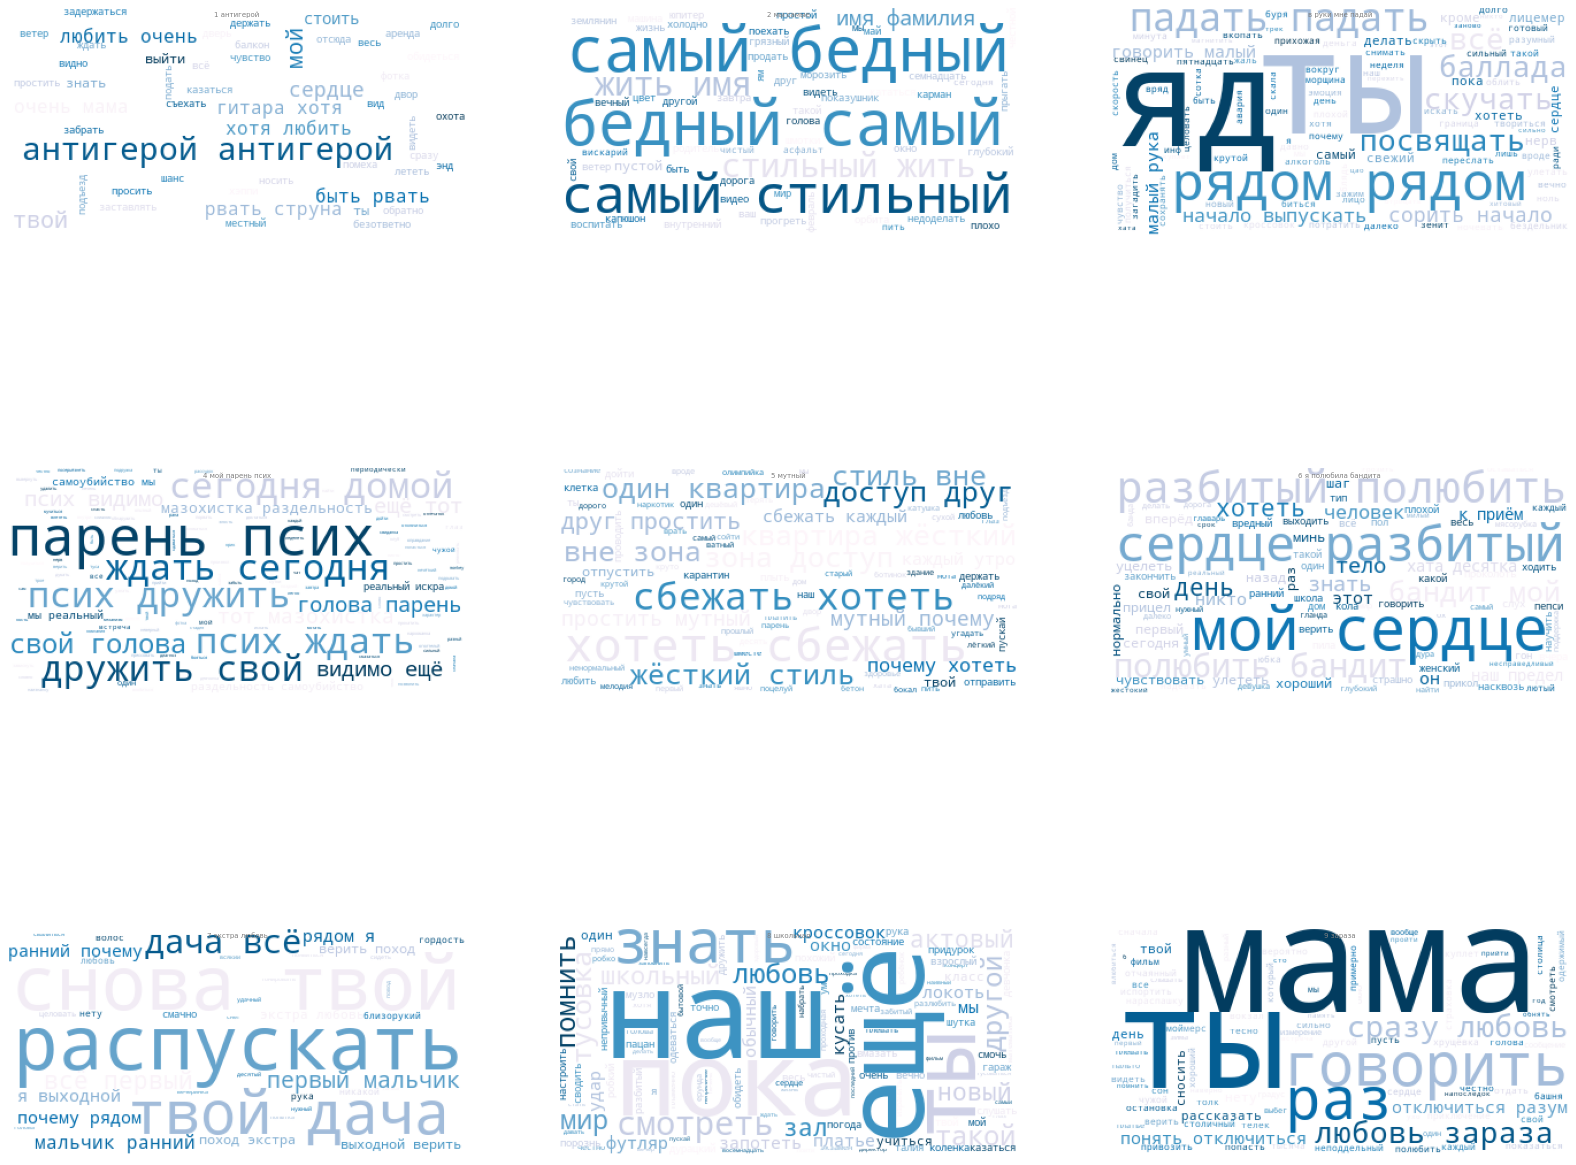

In [48]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.figure(figsize=(28, 24))
i = 1
for name, text in zip(df.name, df.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
    plt.subplot(3, 3, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1

In [49]:

morph = pymorphy2.MorphAnalyzer()

songs = []
total = []
uniq = []
percent = []

for song, text in zip(df.name, df.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)


In [50]:
df_words = pd.DataFrame()
df_words['song'] = songs
df_words['total words'] = total
df_words['uniq words'] = uniq
df_words['percent'] = percent
df_words['time'] = df['time']
df_words['words per minute'] = round(total / (df['time'] // 60))
df_words = df_words[::-1]
df_words

song  total words  uniq words  percent  time  \
8              9 зараза          135          89     66.0   188   
7            8 школьная          151         114     75.0   180   
6       7 экстра любовь          137          38     28.0   192   
5  6 я полюбила бандита          207          91     44.0   254   
4              5 мутный          197          78     40.0   228   
3     4 мой парень псих          238         112     47.0   229   
2      в руки мне падай          178         101     57.0   187   
1            2 мы самые          109          58     53.0   162   
0           1 антигерой          116          54     47.0   192   

   words per minute  
8              45.0  
7              50.0  
6              46.0  
5              52.0  
4              66.0  
3              79.0  
2              59.0  
1              54.0  
0              39.0

In [51]:
colors_1 = ['rgba(101,181,205,255)'] * 12
colors_2 = ['rgba(62,142,231,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='📝 Всего слов',
           text=df_words['total words'],
           textposition='auto',
           x=df_words.song,
           y=df_words['total words'],
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),),
    go.Bar(name='🌀 Уникальных слов',
           text=df_words['uniq words'].astype(str) + '<br>'+ df_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=df_words.song,
           y=df_words['uniq words'],
           textfont_color='white',
           marker_color=colors_2,
           marker=dict(line=dict(width=0)),),
])

fig.update_layout(barmode='group')

fig.update_layout(
    title = 
        {'text':'<b>Соотношение числа уникальных слов к общему количеству</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="right",
))

fig.show()

In [52]:
colors_1 = ['rgba(101,181,205,255)'] * 12
colors_2 = ['rgba(238,85,59,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='⏱️ Длина трека, мин.',
           text=round(df_words['time'] / 60, 1),
           textposition='auto',
           x=df_words.song,
           y=-df_words['time'] // 60,
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),
          ),
    go.Bar(name='🔄 Слов в минуту',
           text=df_words['words per minute'],
           textposition='auto',
           x=df_words.song,
           y=df_words['words per minute'],
           marker_color=colors_2,
           textfont_color='white',
           marker=dict(line=dict(width=0)),
          ),
])

fig.update_layout(barmode='overlay')

fig.update_layout(
    title = 
        {'text':'<b>Длина трека и число слов в минуту</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)'
)


fig.show()

In [53]:
def get_vector(word_list):
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [54]:
vec_list = []
for word in df['text']:
    vec_list.append(get_vector(word.split()))
df['vector'] = vec_list

In [55]:
similar = dict()
result = []
for song_1, vector_1 in zip(df.name, df.vector):
    sub_list = []
    for song_2, vector_2 in zip(df.name.iloc[::-1], df.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res > 0.82 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [56]:
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

name  value
3           6 я полюбила бандита / 9 зараза   0.86
0                  1 антигерой / 8 школьная   0.83
4                     8 школьная / 9 зараза   0.83
1            4 мой парень псих / 8 школьная   0.82
2  4 мой парень псих / 6 я полюбила бандита   0.82

In [57]:
colors = ['rgba(101,181,205,255)'] * 5

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        marker_color=colors,
                        width=[0.4,0.4,0.4,0.4,0.4],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(
    title = 
        {'text':'<b>Топ-5 схожих песен</b><br><span style="color:#666666"></span>'},
    showlegend = False,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()


In [58]:
def get_word_from_tlist(lst):
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in df.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
get_word_from_tlist(sim_word)

думать хотеть бояться теперь подумать девушка потому сам тут сказать 

In [59]:
zaraza2022_vec = sim_word
zaraza2022 = get_word_from_tlist(sim_word)

думать хотеть бояться теперь подумать девушка потому сам тут сказать 

In [60]:
colorscale=[[0.0, "rgba(255,255,255,255)"],
            [0.1, "rgba(229,232,237,255)"],
            [0.2, "rgba(216,222,232,255)"],
            [0.3, "rgba(205,214,228,255)"],
            [0.4, "rgba(182,195,218,255)"],
            [0.5, "rgba(159,178,209,255)"],
            [0.6, "rgba(137,161,200,255)"],
            [0.7, "rgba(107,137,188,255)"],
            [0.8, "rgba(96,129,184,255)"],
            [1.0, "rgba(76,114,176,255)"]]

font_colors = ['black']
x = list(df.name.iloc[::-1])
y = list(df.name)
fig = ff.create_annotated_heatmap(result, x=x, y=y, colorscale=colorscale, font_colors=font_colors)
fig.show()

##Кухня

In [61]:
import nltk
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize, ngrams

%matplotlib inline
nltk.download('punkt')
df = pd.read_csv('kuhny.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 432x288 with 0 Axes>

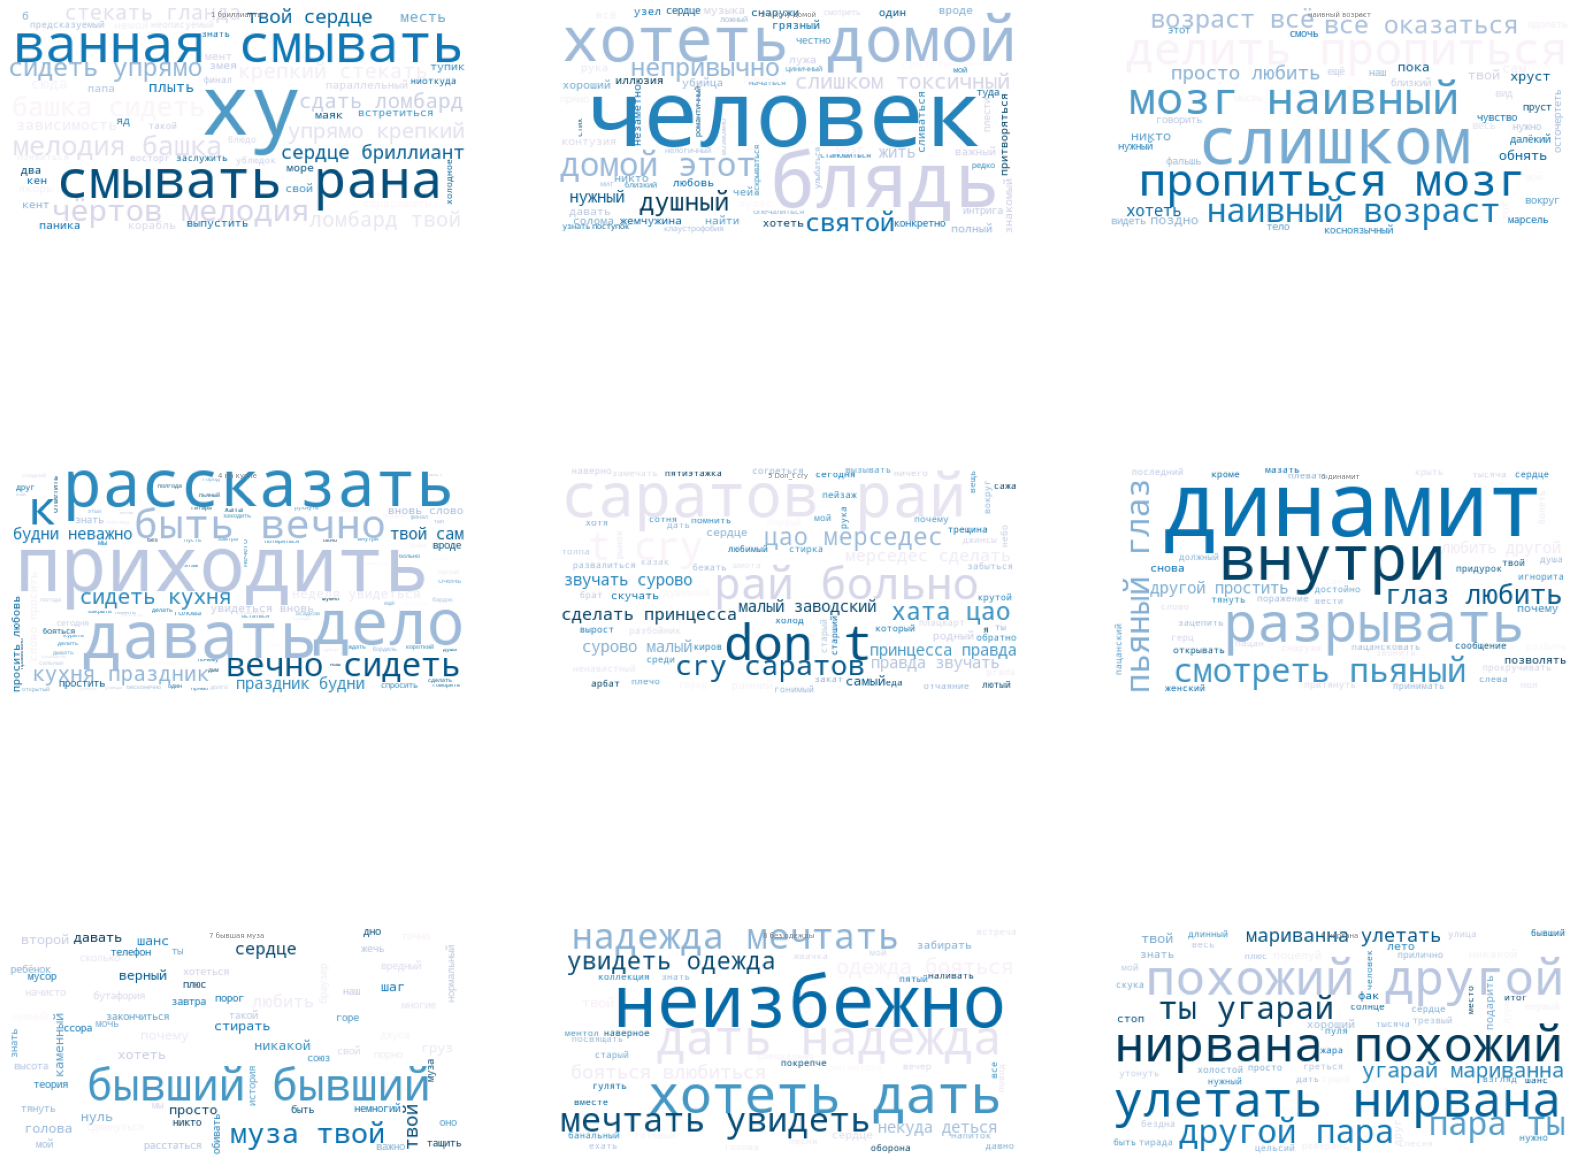

In [62]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.figure(figsize=(28, 24))
i = 1
for name, text in zip(df.name, df.text):
    tokens = word_tokenize(text)
    text_raw = " ".join(tokens)
    wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
    plt.subplot(3, 3, i, label=name,frame_on=True)
    plt.tick_params(labelsize=10)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(name,fontdict={'fontsize':7,'color':'grey'},y=0.93)
    plt.tick_params(labelsize=10)
    i += 1

In [63]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy import spatial
import collections
import pymorphy2
import gensim

morph = pymorphy2.MorphAnalyzer()

In [64]:
morph = pymorphy2.MorphAnalyzer()

songs = []
total = []
uniq = []
percent = []

for song, text in zip(df.name, df.text):
    songs.append(song)
    total.append(len(text.split()))
    uniq.append(len(set(text.split())))
    percent.append(round(len(set(text.split())) / len(text.split()), 2) * 100)

In [65]:
df_words = pd.DataFrame()
df_words['song'] = songs
df_words['total words'] = total
df_words['uniq words'] = uniq
df_words['percent'] = percent
df_words['time'] = df['time']
df_words['words per minute'] = round(total / (df['time'] // 60))
df_words = df_words[::-1]
df_words

song  total words  uniq words  percent  time  words per minute
8        9 нирвана          131          53     40.0   197              44.0
7     8 без одежды          103          41     40.0   153              52.0
6    7 бывшая муза          156          64     41.0   195              52.0
5        6 динамит           86          47     55.0   130              43.0
4      5 Don_t cry          163          76     47.0   182              54.0
3       4 на кухне          201         100     50.0   235              67.0
2  наивный возраст           99          43     43.0   165              50.0
1   2 я хочу домой          122          69     57.0   146              61.0
0     1 бриллианты          112          53     47.0   148              56.0

In [66]:
colors_1 = ['rgba(101,181,205,255)'] * 12
colors_2 = ['rgba(62,142,231,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='📝 Всего слов',
           text=df_words['total words'],
           textposition='auto',
           x=df_words.song,
           y=df_words['total words'],
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),),
    go.Bar(name='🌀 Уникальных слов',
           text=df_words['uniq words'].astype(str) + '<br>'+ df_words.percent.astype(int).astype(str) + '%' ,
           textposition='inside',
           x=df_words.song,
           y=df_words['uniq words'],
           textfont_color='white',
           marker_color=colors_2,
           marker=dict(line=dict(width=0)),),
])

fig.update_layout(barmode='group')

fig.update_layout(
    title = 
        {'text':'<b>Соотношение числа уникальных слов к общему количеству</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
)
fig.update_layout(legend=dict(
    yanchor="top",
    xanchor="right",
))

fig.show()

In [67]:
colors_1 = ['rgba(101,181,205,255)'] * 12
colors_2 = ['rgba(238,85,59,255)'] * 12

fig = go.Figure(data=[
    go.Bar(name='⏱️ Длина трека, мин.',
           text=round(df_words['time'] / 60, 1),
           textposition='auto',
           x=df_words.song,
           y=-df_words['time'] // 60,
           marker_color=colors_1,
           marker=dict(line=dict(width=0)),
          ),
    go.Bar(name='🔄 Слов в минуту',
           text=df_words['words per minute'],
           textposition='auto',
           x=df_words.song,
           y=df_words['words per minute'],
           marker_color=colors_2,
           textfont_color='white',
           marker=dict(line=dict(width=0)),
          ),
])

fig.update_layout(barmode='overlay')

fig.update_layout(
    title = 
        {'text':'<b>Длина трека и число слов в минуту</b><br><span style="color:#666666"></span>'},
    showlegend = True,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)'
)


fig.show()

In [68]:
model = gensim.models.KeyedVectors.load_word2vec_format('model.bin', binary=True)

In [69]:
def get_vector(word_list):
    vector = 0
    for word in word_list:
        pos = morph.parse(word)[0].tag.POS
        if pos == 'INFN':
            pos = 'VERB'
        if pos in ['ADJF', 'PRCL', 'ADVB', 'NPRO']:
            pos = 'NOUN'
        if word and pos:
            try:
                word_pos = word + '_' + pos
                this_vector = model.word_vec(word_pos)
                vector += this_vector
            except KeyError:
                continue
    return vector

In [70]:
vec_list = []
for word in df['text']:
    vec_list.append(get_vector(word.split()))
df['vector'] = vec_list

In [71]:
similar = dict()
result = []
for song_1, vector_1 in zip(df.name, df.vector):
    sub_list = []
    for song_2, vector_2 in zip(df.name.iloc[::-1], df.vector.iloc[::-1]):
        res = 1 - spatial.distance.cosine(vector_1, vector_2)
        if res > 0.72 and song_1 != song_2 and (song_1 + ' / ' + song_2 not in similar.keys() and song_2 + ' / ' + song_1 not in similar.keys()):
            similar[song_1 + ' / ' + song_2] = round(res, 2)
        sub_list.append(round(res, 2))
    result.append(sub_list)

In [72]:
df_top_sim = pd.DataFrame()
df_top_sim['name'] = list(similar.keys())
df_top_sim['value'] = list(similar.values())
df_top_sim.sort_values(by='value', ascending=False)

name  value
4         4 на кухне / 8 без одежды   0.78
2       2 я хочу домой / 4 на кухне   0.74
3  2 я хочу домой / наивный возраст   0.74
1     2 я хочу домой / 8 без одежды   0.73
0          1 бриллианты / 6 динамит   0.72

In [73]:
colors = ['rgba(101,181,205,255)'] * 5

fig = go.Figure([go.Bar(x=df_top_sim['name'],
                        y=df_top_sim['value'],
                        marker_color=colors,
                        width=[0.4,0.4,0.4,0.4,0.4],
                        text=df_top_sim['value'],
                        textfont_color='white',
                        textposition='auto')])

fig.update_layout(
    title = 
        {'text':'<b>Топ-5 схожих песен</b><br><span style="color:#666666"></span>'},
    showlegend = False,
    height=650,
    font={
        'family':'Open Sans, light',
        'color':'black',
        'size':14
    },
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()

In [74]:
def get_word_from_tlist(lst):
    for word in lst:
        word = word[0].split('_')[0]
        print(word, end=' ')

vec_sum = 0
for vec in df.vector:
    vec_sum += vec
sim_word = model.similar_by_vector(vec_sum)
get_word_from_tlist(sim_word)

думать хотеть бояться подумать сам говорить видеть теперь потому сказать 

In [75]:
na_kuhne2020_vec = sim_word
na_kuhne2020 = get_word_from_tlist(sim_word)

думать хотеть бояться подумать сам говорить видеть теперь потому сказать 

In [76]:
colorscale=[[0.0, "rgba(255,255,255,255)"],
            [0.1, "rgba(229,232,237,255)"],
            [0.2, "rgba(216,222,232,255)"],
            [0.3, "rgba(205,214,228,255)"],
            [0.4, "rgba(182,195,218,255)"],
            [0.5, "rgba(159,178,209,255)"],
            [0.6, "rgba(137,161,200,255)"],
            [0.7, "rgba(107,137,188,255)"],
            [0.8, "rgba(96,129,184,255)"],
            [1.0, "rgba(76,114,176,255)"]]

font_colors = ['black']
x = list(df.name.iloc[::-1])
y = list(df.name)
fig = ff.create_annotated_heatmap(result, x=x, y=y, colorscale=colorscale, font_colors=font_colors)
fig.show()

In [77]:
get_word_from_tlist(oderjima2013_vec)

думать бояться видеть чувствовать казаться говорить подумать сам потому сказать 

In [78]:
get_word_from_tlist(no_love2018_vec)

казаться видеть думать чувствовать подумать бояться сам потому сердце замечать 

In [79]:
get_word_from_tlist(na_kuhne2020_vec)

думать хотеть бояться подумать сам говорить видеть теперь потому сказать 

In [80]:
get_word_from_tlist(zaraza2022_vec)

думать хотеть бояться теперь подумать девушка потому сам тут сказать 

In [81]:
def get_word_set_from_tlist(lst):
    a = set()
    for word in lst:
        word = word[0].split('_')[0]
        a.add(word)
    return a

In [82]:
oderjima2013 = get_word_set_from_tlist(oderjima2013_vec)
no_love2018 = get_word_set_from_tlist(no_love2018_vec)
na_kuhne2020 = get_word_set_from_tlist(na_kuhne2020_vec)
zaraza2022 = get_word_set_from_tlist(zaraza2022_vec)

In [83]:
oderjima2013_vec

[('думать_VERB', 0.7286797761917114),
 ('бояться_VERB', 0.6671206951141357),
 ('видеть_VERB', 0.6643577814102173),
 ('чувствовать_VERB', 0.6629588007926941),
 ('казаться_VERB', 0.6584055423736572),
 ('говорить_VERB', 0.652103066444397),
 ('подумать_VERB', 0.6483224630355835),
 ('сам_ADJ', 0.6424522399902344),
 ('потому_ADV', 0.6336206197738647),
 ('сказать_VERB', 0.6314419507980347)]

In [84]:
no_love2018_vec

[('казаться_VERB', 0.6442040801048279),
 ('видеть_VERB', 0.6416723728179932),
 ('думать_VERB', 0.6415549516677856),
 ('чувствовать_VERB', 0.6127278208732605),
 ('подумать_VERB', 0.5959597229957581),
 ('бояться_VERB', 0.5941379070281982),
 ('сам_ADJ', 0.5901448726654053),
 ('потому_ADV', 0.5870011448860168),
 ('сердце_NOUN', 0.5781660676002502),
 ('замечать_VERB', 0.5772628784179688)]

In [85]:
na_kuhne2020_vec

[('думать_VERB', 0.7124046087265015),
 ('хотеть_VERB', 0.6419919729232788),
 ('бояться_VERB', 0.6366304755210876),
 ('подумать_VERB', 0.6315540075302124),
 ('сам_ADJ', 0.6287854909896851),
 ('говорить_VERB', 0.6285713911056519),
 ('видеть_VERB', 0.6254327893257141),
 ('теперь_ADV', 0.6206828355789185),
 ('потому_ADV', 0.6181218028068542),
 ('сказать_VERB', 0.617766797542572)]

In [86]:
zaraza2022_vec

[('думать_VERB', 0.7014497518539429),
 ('хотеть_VERB', 0.6499799489974976),
 ('бояться_VERB', 0.6462557315826416),
 ('теперь_ADV', 0.6359722018241882),
 ('подумать_VERB', 0.6344859600067139),
 ('девушка_NOUN', 0.6337754726409912),
 ('потому_ADV', 0.6326455473899841),
 ('сам_ADJ', 0.6253601312637329),
 ('тут_ADV', 0.6019303798675537),
 ('сказать_VERB', 0.5979719161987305)]

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

In [89]:
!pip install venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19713 sha256=5a17953f87fe183428e40c4ff333a3031ed530f4d696a4536809881c52d2f40d
  Stored in directory: /root/.cache/pip/wheels/24/25/51/e88b9ad98643aa2c27f01a9bf5ccd10b7239e7535135d3feb1
Successfully built venn


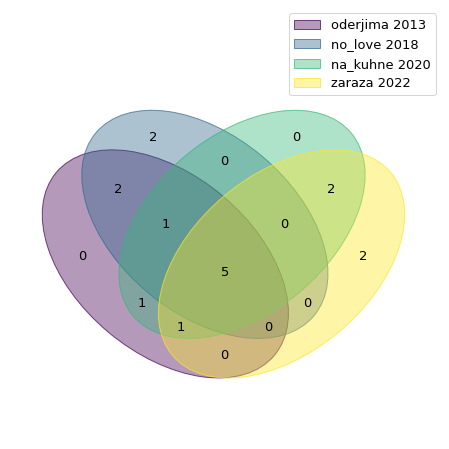

In [90]:
from venn import venn
%matplotlib inline

music = {
    "oderjima 2013": oderjima2013,
    "no_love 2018": no_love2018,
    "na_kuhne 2020": na_kuhne2020,
    "zaraza 2022": zaraza2022,
}
venn(music)